In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
col_names = ['Default_Channel_Grouping','Country','Users','New_Users','Sessions','Bounce_Rate','Pages_Session','Avg_Session_Duration','Ecommerce_Conversion_Rate','Transactions','Revenue']

In [3]:
df = pd.read_csv('Google-ecomerce-demo.csv', skiprows= 7, header = None, names = col_names, skipfooter= 393, engine='python')

In [4]:
df.head()

,Default_Channel_Grouping,Country,Users,New_Users,Sessions,Bounce_Rate,Pages_Session,Avg_Session_Duration,Ecommerce_Conversion_Rate,Transactions,Revenue
0,Direct,United States,"137,753","137,192","192,085",35.44%,6.66,00:04:00,1.57%,"3,008","$196,785.08"
1,Organic Search,United States,"56,016","51,214","78,293",36.47%,5.76,00:03:29,0.50%,392,"$21,183.66"
2,Direct,India,"29,323","28,830","33,119",55.50%,3.30,00:01:47,<0.01%,3,$430.40
3,Referral,United States,"22,026","17,894","47,873",21.73%,9.19,00:05:56,0.13%,61,"$3,008.95"
4,Display,United States,"17,963","17,342","22,339",75.95%,2.80,00:00:55,<0.01%,2,$234.68


In [5]:
df.tail()

,Default_Channel_Grouping,Country,Users,New_Users,Sessions,Bounce_Rate,Pages_Session,Avg_Session_Duration,Ecommerce_Conversion_Rate,Transactions,Revenue
95,Organic Search,Denmark,809,761,912,68.42%,2.39,00:01:13,0.00%,0,$0.00
96,Direct,Greece,807,787,957,62.80%,2.59,00:01:44,0.00%,0,$0.00
97,Direct,Chile,806,798,"1,021",53.28%,3.51,00:02:22,0.00%,0,$0.00
98,(Other),Canada,798,570,"1,189",36.33%,5.34,00:04:00,0.17%,2,$236.40
99,Paid Search,India,798,719,885,80.90%,1.57,00:00:33,0.00%,0,$0.00


In [6]:
df.shape

(100, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Default_Channel_Grouping   100 non-null    object 
 1   Country                    100 non-null    object 
 2   Users                      100 non-null    object 
 3   New_Users                  100 non-null    object 
 4   Sessions                   100 non-null    object 
 5   Bounce_Rate                100 non-null    object 
 6   Pages_Session              100 non-null    float64
 7   Avg_Session_Duration       100 non-null    object 
 8   Ecommerce_Conversion_Rate  100 non-null    object 
 9   Transactions               100 non-null    object 
 10  Revenue                    100 non-null    object 
dtypes: float64(1), object(10)
memory usage: 8.7+ KB


In [8]:
#Checking the data types

df.dtypes

Default_Channel_Grouping      object
Country                       object
Users                         object
New_Users                     object
Sessions                      object
Bounce_Rate                   object
Pages_Session                float64
Avg_Session_Duration          object
Ecommerce_Conversion_Rate     object
Transactions                  object
Revenue                       object
dtype: object

In [9]:
# Checking for any missing data

df.isnull().sum()

Default_Channel_Grouping     0
Country                      0
Users                        0
New_Users                    0
Sessions                     0
Bounce_Rate                  0
Pages_Session                0
Avg_Session_Duration         0
Ecommerce_Conversion_Rate    0
Transactions                 0
Revenue                      0
dtype: int64

In [10]:
df.columns

Index(['Default_Channel_Grouping', 'Country', 'Users', 'New_Users', 'Sessions',
       'Bounce_Rate', 'Pages_Session', 'Avg_Session_Duration',
       'Ecommerce_Conversion_Rate', 'Transactions', 'Revenue'],
      dtype='object')

Because the dataset contains some special characters, so we will do a little bit of clean up.

In [11]:
# Removing special characters from the dataset

df['Bounce_Rate'] = df['Bounce_Rate'].apply(lambda x: x.replace("%",""))
df['Ecommerce_Conversion_Rate'] = df['Ecommerce_Conversion_Rate'].apply(lambda x: x.replace("%","").replace("<",""))
df['Transactions'] = df['Transactions'].apply(lambda x: x.replace(",",""))
df['Revenue'] = df['Revenue'].apply(lambda x: x.replace("$","").replace(",",""))
df['Users'] = df['Users'].apply(lambda x: x.replace(",",""))
df['New_Users'] = df['New_Users'].apply(lambda x: x.replace(",",""))
df['Sessions'] = df['Sessions'].apply(lambda x: x.replace(",",""))

In [12]:
df.head(2)

,Default_Channel_Grouping,Country,Users,New_Users,Sessions,Bounce_Rate,Pages_Session,Avg_Session_Duration,Ecommerce_Conversion_Rate,Transactions,Revenue
0,Direct,United States,137753,137192,192085,35.44,6.66,00:04:00,1.57,3008,196785.08
1,Organic Search,United States,56016,51214,78293,36.47,5.76,00:03:29,0.50,392,21183.66


In [13]:
# Creating extra column to extracting the minuites from the Avg_Session_Duration column

df['Minutes'] = df['Avg_Session_Duration'].str.split(':').str[1]

In [14]:
#  Creating extra column to extracting the seconds from the Avg_Session_Duration column

df['Seconds'] = df['Avg_Session_Duration'].str.split(':').str[2]

In [15]:
df.head(2)

,Default_Channel_Grouping,Country,Users,New_Users,Sessions,Bounce_Rate,Pages_Session,Avg_Session_Duration,Ecommerce_Conversion_Rate,Transactions,Revenue,Minutes,Seconds
0,Direct,United States,137753,137192,192085,35.44,6.66,00:04:00,1.57,3008,196785.08,04,00
1,Organic Search,United States,56016,51214,78293,36.47,5.76,00:03:29,0.50,392,21183.66,03,29


In [16]:
df.describe()

,Pages_Session
count,100.000000
mean,3.500900
std,1.186852
min,1.550000
25%,2.920000
50%,3.205000
75%,3.767500
max,9.190000


We need to converts other columns with numerical values into int or float data types.

In [17]:
# Typecasting some columns

df['Users'] = pd.to_numeric(df['Users'])
df['New_Users'] = pd.to_numeric(df['New_Users'])
df['Sessions'] = pd.to_numeric(df['Sessions'])
df['Bounce_Rate'] = pd.to_numeric(df['Bounce_Rate'])
df['Ecommerce_Conversion_Rate'] = pd.to_numeric(df['Ecommerce_Conversion_Rate'])
df['Transactions'] = df['Transactions'].astype(int)
df['Revenue'] = pd.to_numeric(df['Revenue'])
df['Minutes'] = pd.to_numeric(df['Minutes'])
df['Seconds'] = pd.to_numeric(df['Seconds'])

In [18]:
df.dtypes

Default_Channel_Grouping      object
Country                       object
Users                          int64
New_Users                      int64
Sessions                       int64
Bounce_Rate                  float64
Pages_Session                float64
Avg_Session_Duration          object
Ecommerce_Conversion_Rate    float64
Transactions                   int32
Revenue                      float64
Minutes                        int64
Seconds                        int64
dtype: object

In [19]:
# Transpose statistical analysis of the transpose columns

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Users,100.0,5562.5700,15073.628818,798.00,1332.500,2102.000,3941.5000,137753.00
New_Users,100.0,5302.3600,14808.946546,570.00,1182.500,1902.000,3808.0000,137192.00
Sessions,100.0,7469.5000,21160.683401,885.00,1574.250,2666.000,5173.0000,192085.00
Bounce_Rate,100.0,55.6491,10.294072,21.73,50.905,56.660,61.5150,84.56
Pages_Session,100.0,3.5009,1.186852,1.55,2.920,3.205,3.7675,9.19
Ecommerce_Conversion_Rate,100.0,0.0943,0.310315,0.00,0.000,0.000,0.0500,2.18
Transactions,100.0,40.5200,303.587056,0.00,0.000,0.000,2.0000,3008.00
Revenue,100.0,2600.6456,19815.159626,0.00,0.000,0.000,101.0800,196785.08
Minutes,100.0,1.9900,0.958692,0.00,1.000,2.000,2.0000,5.00
Seconds,100.0,28.9000,18.186742,0.00,12.750,31.000,44.0000,58.00


In [20]:
#Checking for how many unique countries in the dataset

df.Country.nunique()

45

In [21]:
df.Country.unique()

array(['United States', 'India', 'Canada', 'United Kingdom', 'France',
       'Spain', 'Japan', 'Germany', 'Taiwan', 'South Korea', 'Singapore',
       'Italy', 'Brazil', 'Australia', 'Netherlands', 'China', 'Poland',
       'Mexico', 'Russia', 'Indonesia', 'Turkey', 'Hong Kong', 'Ireland',
       'Colombia', 'Sweden', 'Switzerland', 'Malaysia', 'Philippines',
       'Thailand', 'Belgium', 'Peru', 'Vietnam', '(not set)', 'Ukraine',
       'Israel', 'Pakistan', 'Portugal', 'Argentina',
       'United Arab Emirates', 'Denmark', 'Romania', 'Czechia',
       'Saudi Arabia', 'Greece', 'Chile'], dtype=object)

In [22]:
# Filtering the the row with country value((not set))

df[df['Country']=='(not set)']

,Default_Channel_Grouping,Country,Users,New_Users,Sessions,Bounce_Rate,Pages_Session,Avg_Session_Duration,Ecommerce_Conversion_Rate,Transactions,Revenue,Minutes,Seconds
68,Direct,(not set),1417,1306,1699,47.85,5.3,00:03:03,2.18,37,1635.04,3,3


In [23]:
# Droping the row index with country value as (not set)

df = df.drop(df.index[68]).reset_index(drop=True)

In [24]:
df.Country.unique()

array(['United States', 'India', 'Canada', 'United Kingdom', 'France',
       'Spain', 'Japan', 'Germany', 'Taiwan', 'South Korea', 'Singapore',
       'Italy', 'Brazil', 'Australia', 'Netherlands', 'China', 'Poland',
       'Mexico', 'Russia', 'Indonesia', 'Turkey', 'Hong Kong', 'Ireland',
       'Colombia', 'Sweden', 'Switzerland', 'Malaysia', 'Philippines',
       'Thailand', 'Belgium', 'Peru', 'Vietnam', 'Ukraine', 'Israel',
       'Pakistan', 'Portugal', 'Argentina', 'United Arab Emirates',
       'Denmark', 'Romania', 'Czechia', 'Saudi Arabia', 'Greece', 'Chile'],
      dtype=object)

In [25]:
df.Default_Channel_Grouping.nunique()

8

We have 8 unique different advertising channels.

In [26]:
df.Default_Channel_Grouping.value_counts()

Direct            44
Organic Search    32
Referral           8
(Other)            4
Social             3
Affiliates         3
Paid Search        3
Display            2
Name: Default_Channel_Grouping, dtype: int64

Direct seems to have the highest occurrence, followed by Organic Search.

In [27]:
#Removing the special character from Default_Channel_Grouping(Other)

df['Default_Channel_Grouping'] = df['Default_Channel_Grouping'].apply(lambda x: x.replace(")","").replace("(","").strip())

In [28]:
df.Default_Channel_Grouping.value_counts()

Direct            44
Organic Search    32
Referral           8
Other              4
Social             3
Affiliates         3
Paid Search        3
Display            2
Name: Default_Channel_Grouping, dtype: int64

In [29]:
df.head()

,Default_Channel_Grouping,Country,Users,New_Users,Sessions,Bounce_Rate,Pages_Session,Avg_Session_Duration,Ecommerce_Conversion_Rate,Transactions,Revenue,Minutes,Seconds
0,Direct,United States,137753,137192,192085,35.44,6.66,00:04:00,1.57,3008,196785.08,4,0
1,Organic Search,United States,56016,51214,78293,36.47,5.76,00:03:29,0.50,392,21183.66,3,29
2,Direct,India,29323,28830,33119,55.50,3.30,00:01:47,0.01,3,430.40,1,47
3,Referral,United States,22026,17894,47873,21.73,9.19,00:05:56,0.13,61,3008.95,5,56
4,Display,United States,17963,17342,22339,75.95,2.80,00:00:55,0.01,2,234.68,0,55


In [30]:
# find total duplicate entries and drop them if any

print(f'total duplicate rows: {df.duplicated().sum()}')

total duplicate rows: 0


In [31]:
# saveing the cleaned df to csv

df.to_csv('df_cleaned.csv', index=False)

In [32]:
# let's import the cleaned version of the updated df

df = pd.read_csv("df_cleaned.csv")

In [33]:
Country = df['Country'].value_counts()
Country

United States           8
India                   7
Canada                  6
Taiwan                  4
United Kingdom          4
South Korea             3
Spain                   3
Japan                   3
Indonesia               3
Argentina               2
Brazil                  2
Italy                   2
Poland                  2
Colombia                2
Peru                    2
France                  2
Malaysia                2
Russia                  2
Australia               2
Mexico                  2
Sweden                  2
Singapore               2
China                   2
Netherlands             2
Ireland                 2
Switzerland             2
Philippines             2
Hong Kong               2
Germany                 2
Belgium                 2
Turkey                  2
Denmark                 2
Saudi Arabia            1
Czechia                 1
Romania                 1
Vietnam                 1
Thailand                1
United Arab Emirates    1
Portugal    

In [34]:
# There are 44 unique countries

df.Country.nunique()

44

In [35]:
#Putting the categorical columns together

df_cat = df.loc[:, 'Default_Channel_Grouping':'Country']

In [36]:
df_cat.head()

,Default_Channel_Grouping,Country
0,Direct,United States
1,Organic Search,United States
2,Direct,India
3,Referral,United States
4,Display,United States


C:\Users\JA\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


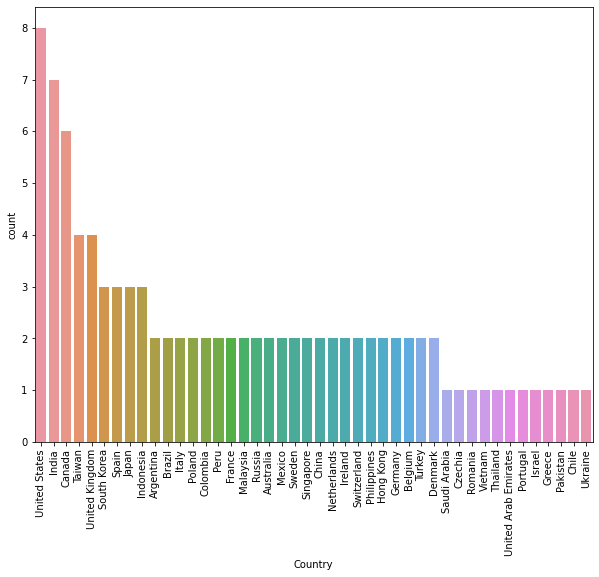

In [37]:
#Plotting the country values

plt.figure(figsize=(10,8))
sns.countplot(df_cat['Country'], order=df_cat['Country'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

C:\Users\JA\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


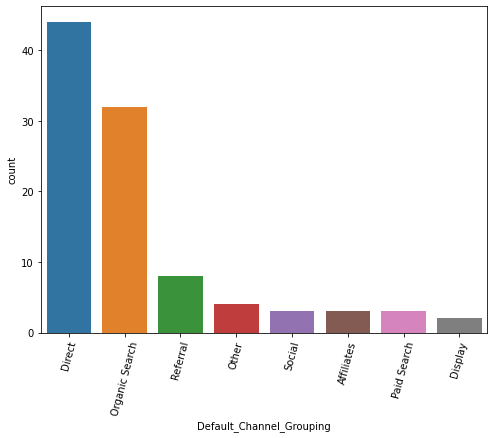

In [38]:
#Plotting the Default_Channel_Grouping values

fig = plt.figure(1, (8,6))

ax1 = plt.subplot(1,1,1)
sns.countplot(df_cat['Default_Channel_Grouping'], order=df_cat['Default_Channel_Grouping'].value_counts().index)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=75)

plt.show()

In [39]:
#df_num = df.loc[:, 'Users':'Revenue'].drop('Avg_Session_Duration', axis=1)

In [40]:
#df_num.head()

In [41]:
cat=['Default_Channel_Grouping', 'Country']

C:\Users\JA\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\JA\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


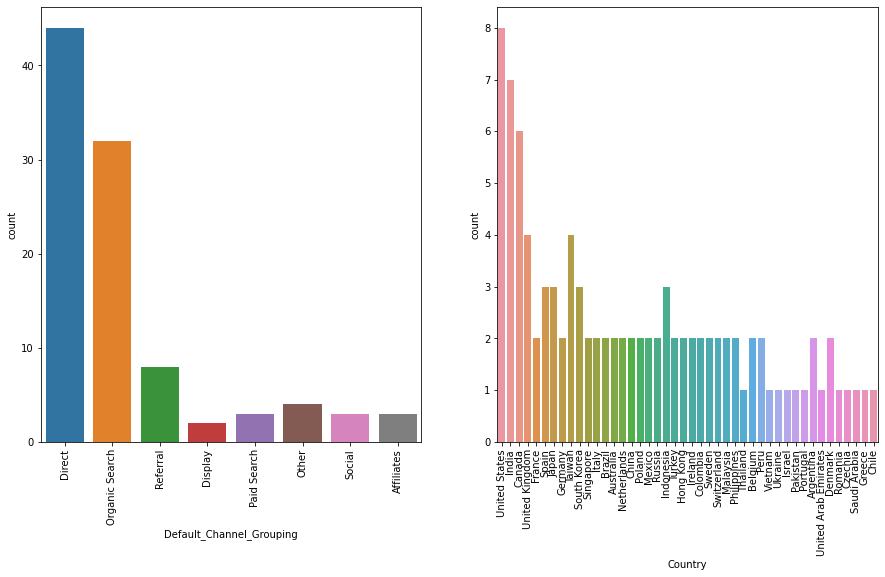

In [42]:
#Alternative ploting of the categorical columns

plt.figure(figsize=(15,8))
for i in enumerate(cat):
    plt.subplot(1,2, i[0]+1)
    sns.countplot(i[1], data=df)
    plt.xticks(rotation=90)

In [43]:
#Assigning all the numerial to a variable

num = ['Users', 'New_Users', 'Sessions','Bounce_Rate', 'Pages_Session','Ecommerce_Conversion_Rate', 'Transactions', 'Revenue']

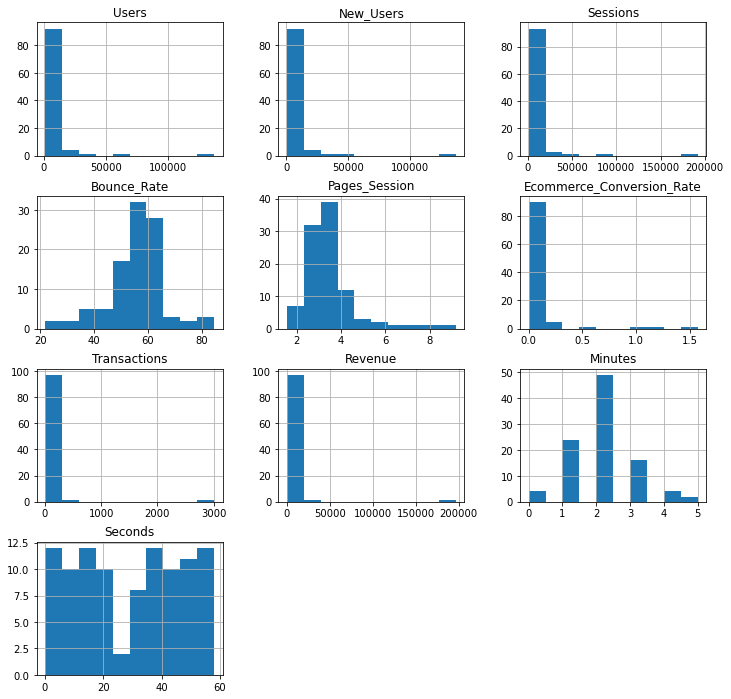

In [44]:
# The data distribution of the numerical values.

df.hist(figsize=(12,12))
plt.show()

In [45]:
df.columns

Index(['Default_Channel_Grouping', 'Country', 'Users', 'New_Users', 'Sessions',
       'Bounce_Rate', 'Pages_Session', 'Avg_Session_Duration',
       'Ecommerce_Conversion_Rate', 'Transactions', 'Revenue', 'Minutes',
       'Seconds'],
      dtype='object')

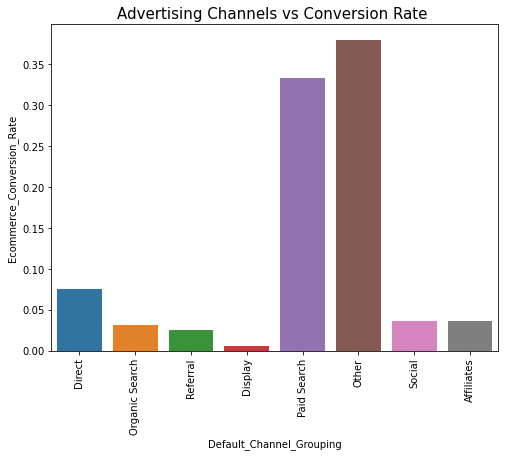

In [46]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='Default_Channel_Grouping', y='Ecommerce_Conversion_Rate', ci=None)
plt.title('Advertising Channels vs Conversion Rate ', fontsize=(15))
plt.xticks(rotation=90)
plt.show()

In [47]:
#df.groupby('Default_Channel_Grouping').sum()['Transactions'].sort_values(ascending=False)
# OR

df[['Default_Channel_Grouping', 'Transactions']].groupby('Default_Channel_Grouping').agg({'Transactions':'sum'}).sort_values('Transactions',ascending=False)

,Transactions
Default_Channel_Grouping,
Direct,3126
Organic Search,420
Other,226
Paid Search,172
Referral,62
Social,4
Affiliates,3
Display,2


The advertising channel that brought highest transaction is the Direct, second by Organic Search and the rest

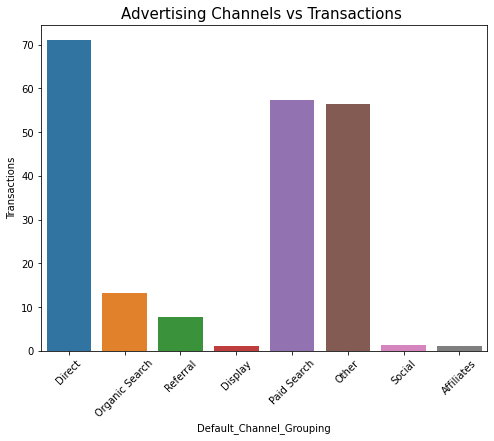

In [48]:
plt.figure(figsize=(8,6))
sns.barplot(x='Default_Channel_Grouping', y='Transactions', data=df, ci=None)
plt.title('Advertising Channels vs Transactions ', fontsize=(15))
plt.xticks(rotation=45)
plt.show()

In [49]:
df.groupby(['Default_Channel_Grouping','Country']).sum()['Transactions'].nlargest(20)

Default_Channel_Grouping  Country       
Direct                    United States     3008
Organic Search            United States      392
Other                     United States      222
Paid Search               United States      172
Referral                  United States       61
Direct                    Canada              41
                          Taiwan              23
Organic Search            Canada              19
Direct                    United Kingdom       8
                          Mexico               7
                          Australia            4
                          Japan                4
                          South Korea          4
Organic Search            Mexico               4
Social                    United States        4
Affiliates                United States        3
Direct                    France               3
                          India                3
                          Philippines          3
                          Si

### Most of the transactions were from the united states through
+ Direct
+ Organic Search
+ Other
+ Paid Search
+ Referral 

In [50]:
# First top ten countries with the highest Revenue.

country_rev = df.groupby('Country').sum()['Revenue'].sort_values(ascending=False).nlargest(10)
country_rev

Country
United States     247624.86
Canada              4702.56
Taiwan              1475.84
Mexico               915.54
Japan                755.25
United Kingdom       565.74
India                493.20
Singapore            315.22
South Korea          268.30
Philippines          265.20
Name: Revenue, dtype: float64

The top ten countries Revenue to the Ecommerce store.
The highest revenue is from the United States, followed by canada and the rest.

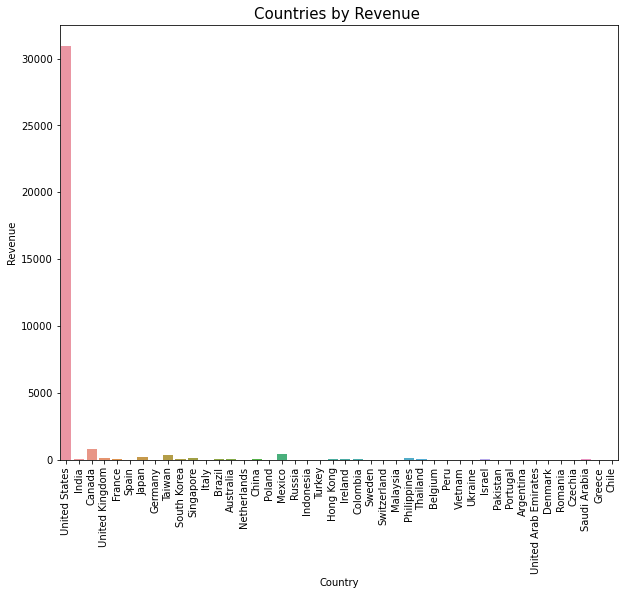

In [51]:
plt.figure(figsize=(10,8))
sns.barplot(x='Country', y='Revenue', data=df, ci=None)
plt.title('Countries by Revenue ', fontsize=(15))
plt.xticks(rotation=90)
plt.show()

In [52]:
mm = df.groupby(['Country','Default_Channel_Grouping']).sum()['Users'].sort_values(ascending=False)
mm.reset_index().head(50)

,Country,Default_Channel_Grouping,Users
0,United States,Direct,137753
1,United States,Organic Search,56016
2,India,Direct,29323
3,United States,Referral,22026
4,United States,Display,17963
5,India,Organic Search,17691
6,Canada,Direct,14665
7,United Kingdom,Direct,12225
8,United States,Paid Search,12147
9,United Kingdom,Organic Search,10750


In [53]:
f = {'Sessions':'mean',
     'Bounce_Rate':'mean',
     'Pages_Session':['mean','sum']}

In [54]:
df.groupby('Default_Channel_Grouping').agg(f)

Sessions Bounce_Rate Pages_Session        
                                  mean        mean          mean     sum
Default_Channel_Grouping                                                
Affiliates                 2115.666667   62.170000      2.350000    7.05
Direct                     9017.022727   55.186818      3.467727  152.58
Display                   13713.000000   73.280000      3.390000    6.78
Organic Search             6209.031250   59.208750      3.119063   99.81
Other                      5830.500000   33.847500      5.105000   20.42
Paid Search                7807.333333   70.656667      2.850000    8.55
Referral                   7806.250000   43.336250      4.652500   37.22
Social                     2282.000000   55.680000      4.126667   12.38

In [55]:
usa = df[df['Country']=='United States']
usa

,Default_Channel_Grouping,Country,Users,New_Users,Sessions,Bounce_Rate,Pages_Session,Avg_Session_Duration,Ecommerce_Conversion_Rate,Transactions,Revenue,Minutes,Seconds
0,Direct,United States,137753,137192,192085,35.44,6.66,00:04:00,1.57,3008,196785.08,4,0
1,Organic Search,United States,56016,51214,78293,36.47,5.76,00:03:29,0.50,392,21183.66,3,29
3,Referral,United States,22026,17894,47873,21.73,9.19,00:05:56,0.13,61,3008.95,5,56
4,Display,United States,17963,17342,22339,75.95,2.80,00:00:55,0.01,2,234.68,0,55
8,Paid Search,United States,12147,10580,17181,46.51,5.43,00:03:09,1.00,172,10505.14,3,9
10,Other,United States,10461,8133,17754,26.24,7.26,00:04:57,1.25,222,15386.73,4,57
31,Social,United States,3283,3106,3647,50.23,4.32,00:02:09,0.11,4,259.90,2,9
45,Affiliates,United States,2296,2030,2853,61.72,2.65,00:02:09,0.11,3,260.72,2,9


In [56]:
usa['Transactions'].sum()

3864

#### United States alone made 3864 Transactions

In [57]:
usa.groupby('Default_Channel_Grouping').sum()['Revenue'].sort_values(ascending=False)

Default_Channel_Grouping
Direct            196785.08
Organic Search     21183.66
Other              15386.73
Paid Search        10505.14
Referral            3008.95
Affiliates           260.72
Social               259.90
Display              234.68
Name: Revenue, dtype: float64

### USA Revenue Channels
+ Majority of the revenue comes from Direct traffic to the site

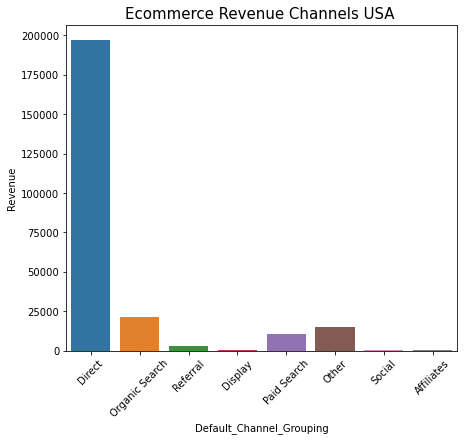

In [58]:
plt.figure(figsize=(7,6))
sns.barplot(data=usa, x='Default_Channel_Grouping', y='Revenue', ci=None)
plt.title('Ecommerce Revenue Channels USA ', fontsize=(15))
plt.xticks(rotation=45)
plt.show()

In [59]:
# usa verses new_user
usa.groupby('Default_Channel_Grouping').sum()['New_Users'].sort_values(ascending=False)

Default_Channel_Grouping
Direct            137192
Organic Search     51214
Referral           17894
Display            17342
Paid Search        10580
Other               8133
Social              3106
Affiliates          2030
Name: New_Users, dtype: int64

### New_Users
+ Majority of new users to the site are from USA comes from Direct

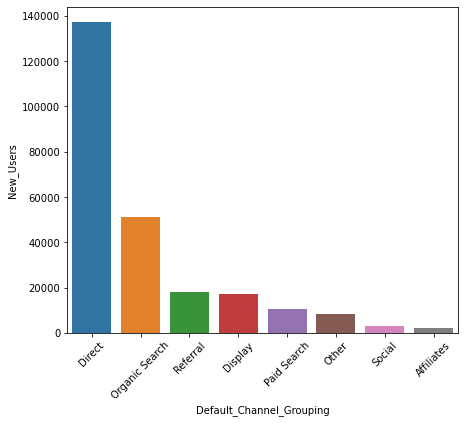

In [60]:
plt.figure(figsize=(7,6))
sns.barplot(data=usa, x='Default_Channel_Grouping', y='New_Users', ci=None)
plt.xticks(rotation=45)
plt.show()

In [61]:
bounce_rate = usa.groupby('Default_Channel_Grouping').mean()['Bounce_Rate'].sort_values(ascending=False)
bounce_rate.reset_index()

,Default_Channel_Grouping,Bounce_Rate
0,Display,75.95
1,Affiliates,61.72
2,Social,50.23
3,Paid Search,46.51
4,Organic Search,36.47
5,Direct,35.44
6,Other,26.24
7,Referral,21.73


### Channels VS Bounce_Rate
+ Display has got the highest average bounce rate(people leaving the site too quickly), then followe by Affilates and social

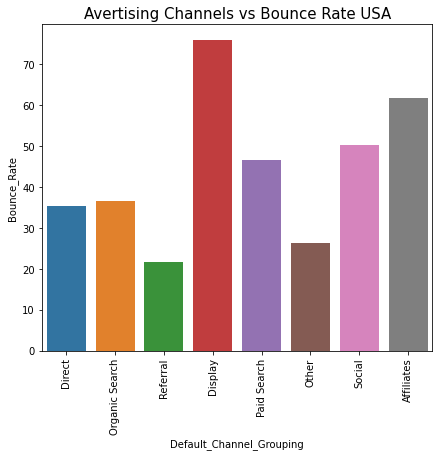

In [62]:
plt.figure(figsize=(7,6))
sns.barplot(data=usa, x='Default_Channel_Grouping', y='Bounce_Rate', estimator=np.mean, ci=None)
plt.title('Avertising Channels vs Bounce Rate USA', fontsize=(15))
plt.xticks(rotation=90)
plt.show()

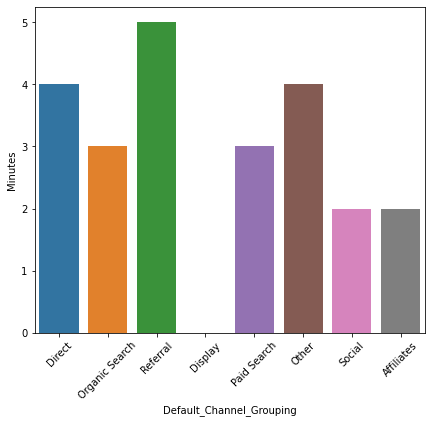

In [63]:
plt.figure(figsize=(7,6))
sns.barplot(data=usa, x='Default_Channel_Grouping', y='Minutes',  estimator=np.mean, ci=None)
plt.xticks(rotation=45)
plt.show()

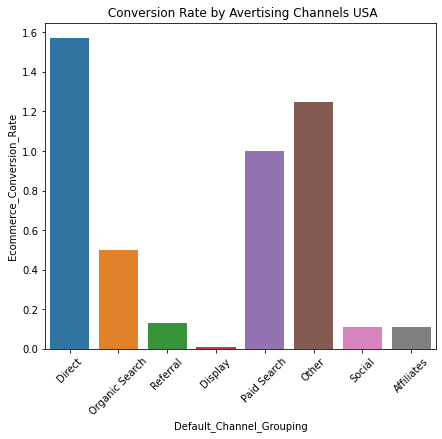

In [64]:
plt.figure(figsize=(7,6))
sns.barplot(data=usa, x='Default_Channel_Grouping', y='Ecommerce_Conversion_Rate', ci=None)
plt.title(' Conversion Rate by Avertising Channels USA', fontsize=(12))
plt.xticks(rotation=45)
plt.show()

### Conversion_Rate by Channels
+ The best conversion rate comes from Direct, then from Others and Paid Search

In [65]:
canada = df[df['Country']=='Canada']
canada

,Default_Channel_Grouping,Country,Users,New_Users,Sessions,Bounce_Rate,Pages_Session,Avg_Session_Duration,Ecommerce_Conversion_Rate,Transactions,Revenue,Minutes,Seconds
6,Direct,Canada,14665,14653,19361,45.91,4.46,00:03:11,0.21,41,3274.86,3,11
12,Organic Search,Canada,6933,6376,9487,39.51,4.84,00:03:13,0.20,19,1191.30,3,13
19,Paid Search,Canada,5022,4959,5356,84.56,1.55,00:00:22,0.00,0,0.00,0,22
28,Display,Canada,3730,3653,5087,70.61,3.98,00:01:15,0.00,0,0.00,1,15
72,Referral,Canada,1371,1055,2625,31.54,8.09,00:05:43,0.00,0,0.00,5,43
97,Other,Canada,798,570,1189,36.33,5.34,00:04:00,0.17,2,236.40,4,0


In [66]:
canada.groupby('Default_Channel_Grouping').sum()['Revenue'].sort_values(ascending=False).reset_index()

,Default_Channel_Grouping,Revenue
0,Direct,3274.86
1,Organic Search,1191.30
2,Other,236.40
3,Referral,0.00
4,Paid Search,0.00
5,Display,0.00


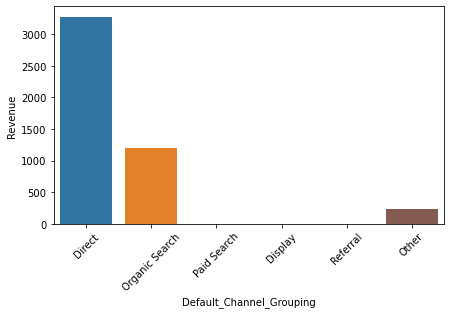

In [67]:
plt.figure(figsize=(7,4))
sns.barplot(data=canada, x='Default_Channel_Grouping', y='Revenue')
plt.xticks(rotation=45)
plt.show()

In [68]:
canada.groupby('Default_Channel_Grouping').sum()['Revenue'].sort_values(ascending=False)

Default_Channel_Grouping
Direct            3274.86
Organic Search    1191.30
Other              236.40
Referral             0.00
Paid Search          0.00
Display              0.00
Name: Revenue, dtype: float64

Majority of Revenue from canada comes from three advertising channels
+ Direct
+ Organic search
+ Other

In [69]:
df.columns

Index(['Default_Channel_Grouping', 'Country', 'Users', 'New_Users', 'Sessions',
       'Bounce_Rate', 'Pages_Session', 'Avg_Session_Duration',
       'Ecommerce_Conversion_Rate', 'Transactions', 'Revenue', 'Minutes',
       'Seconds'],
      dtype='object')

In [70]:
canada.groupby('Default_Channel_Grouping').sum()['Transactions'].sort_values(ascending=False)

Default_Channel_Grouping
Direct            41
Organic Search    19
Other              2
Referral           0
Paid Search        0
Display            0
Name: Transactions, dtype: int64

In [71]:
canada.groupby('Default_Channel_Grouping').sum()['Ecommerce_Conversion_Rate'].sort_values(ascending=False)

Default_Channel_Grouping
Direct            0.21
Organic Search    0.20
Other             0.17
Referral          0.00
Paid Search       0.00
Display           0.00
Name: Ecommerce_Conversion_Rate, dtype: float64

In [72]:
canada.groupby('Default_Channel_Grouping').mean()[['Users', 'New_Users']].sort_values('New_Users',ascending=False)

,Users,New_Users
Default_Channel_Grouping,,
Direct,14665,14653
Organic Search,6933,6376
Paid Search,5022,4959
Display,3730,3653
Referral,1371,1055
Other,798,570
